In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats
import math

In [55]:
data = pd.read_csv("../data/with_scores.csv")
data = data[data['state']=='California']
data = data[data['ethnicity'] == 'All']
data = data[data['campus'] == 'Berkeley']
data['yield'] = data['enr_num'] / data['adm_num']

In [56]:
X_cols = ['year', 
        'app_num', 'adm_num', 
        'app_gpa', 'adm_gpa',
       'distance',
       'ap_num_scr1', 'ap_num_scr2', 'ap_num_scr3', 'ap_num_scr4', 'ap_num_scr5',
       'ap_num_test_takers',
       'enroll12',
       'sat_total_avg', 'sat_num_test_takers']
y_col = ['yield']
relevant = data[X_cols+y_col].dropna()
X = relevant[X_cols]
y = relevant[y_col]

In [ ]:
data[X_cols+['school_num']].dropna()

In [57]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1279.0,2004.924159,4.182238,1998.000000,2001.000000,2005.000000,2008.000000,2012.000000
app_num,1279.0,73.389367,43.885237,11.000000,41.000000,66.000000,92.000000,308.000000
adm_num,1279.0,19.123534,11.555489,5.000000,11.000000,17.000000,23.500000,86.000000
app_gpa,1279.0,3.834632,0.114829,3.302895,3.763218,3.842614,3.914802,4.112941
adm_gpa,1279.0,4.152352,0.095893,3.495000,4.102546,4.172000,4.218990,4.343333
distance,1279.0,354541.043002,290957.950135,662.000000,51515.000000,287380.000000,633267.000000,958441.000000
ap_num_scr1,1279.0,77.834246,66.716688,0.000000,32.000000,59.000000,105.500000,456.000000
ap_num_scr2,1279.0,130.146990,76.434842,0.000000,75.000000,119.000000,170.000000,472.000000
ap_num_scr3,1279.0,185.225958,113.437972,0.000000,99.000000,168.000000,251.000000,642.000000
ap_num_scr4,1279.0,169.809226,124.978550,0.000000,75.000000,141.000000,243.000000,719.000000


In [58]:
y.describe()

,yield
count,1279.000000
mean,0.545578
std,0.173166
min,0.178571
25%,0.419677
50%,0.523810
75%,0.650000
max,1.000000


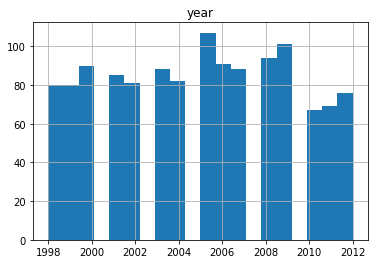

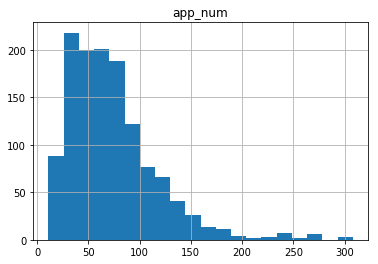

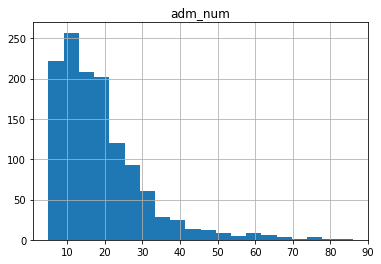

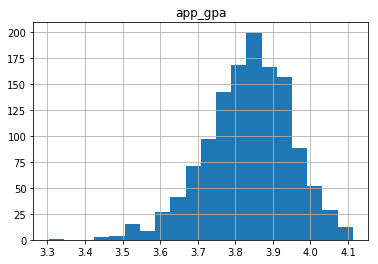

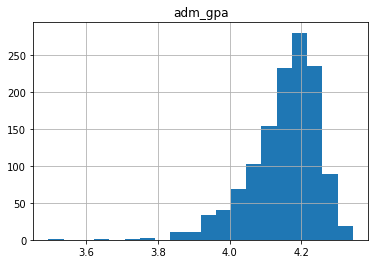

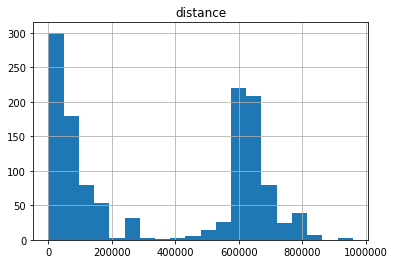

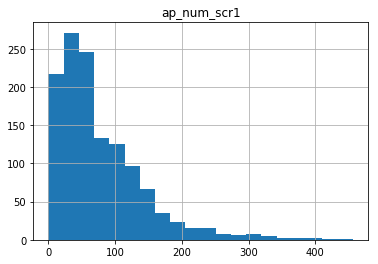

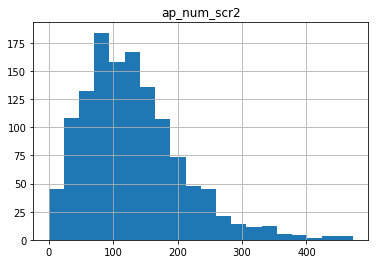

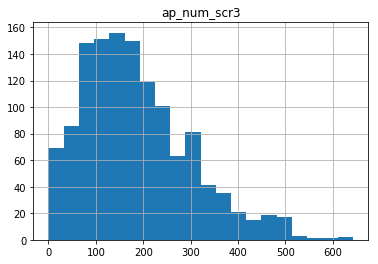

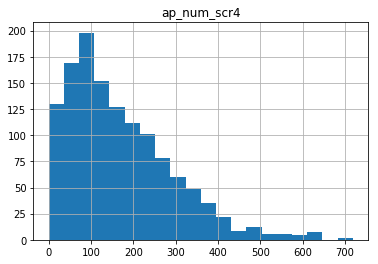

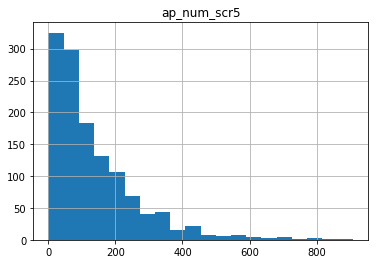

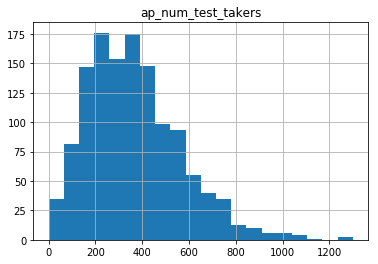

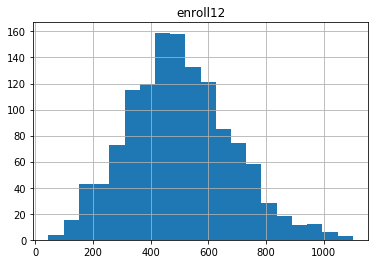

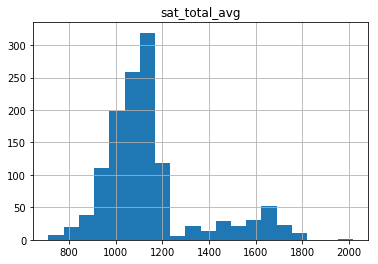

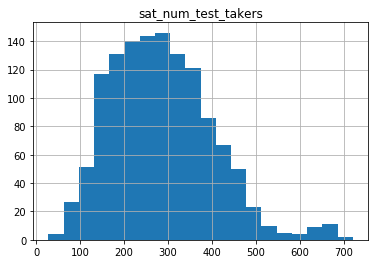

In [59]:
for col in X.columns:
    plt.figure()
    plt.title(col)
    X[col].hist(bins=20)

## Normalize all the data by taking z-scores

In [60]:
X_z = (X-X.mean(axis=0)) / X.std(axis=0)
y_z = (y-y.mean(axis=0)) / y.std(axis=0)

In [61]:
X_z.head()

,year,app_num,adm_num,app_gpa,adm_gpa,distance,ap_num_scr1,ap_num_scr2,ap_num_scr3,ap_num_scr4,ap_num_scr5,ap_num_test_takers,enroll12,sat_total_avg,sat_num_test_takers
3750,-1.655611,-0.646900,-1.135697,-1.716259,-2.162336,-1.104985,-0.342257,-0.891570,-1.262593,-1.174675,-0.947565,-1.299483,-0.469935,-0.893114,0.268675
3757,-1.655611,0.401288,1.287394,-1.298681,-3.087850,-1.142987,-1.076706,-1.284061,-0.716039,-0.318528,0.109596,-0.616415,-1.121677,0.161383,-0.414343
3766,-1.655611,-0.783620,-0.703002,0.388390,-0.195176,-0.945986,-0.971785,-0.603743,-0.998131,-1.222684,-0.910601,-1.324412,-0.603625,-0.651951,-0.794758
3769,-1.655611,-0.441820,-0.616463,-0.622525,-2.761965,0.868081,-0.896841,-1.270978,-0.865900,-0.862622,-0.614892,-0.960442,-0.514498,-0.127067,-0.163614
3773,-1.655611,0.082274,0.075848,0.483336,-0.924659,-1.164708,-0.642032,-0.996234,-0.795377,-0.926633,-0.762746,-1.000329,-0.709464,-0.533734,-0.345176


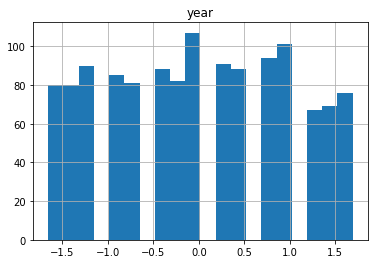

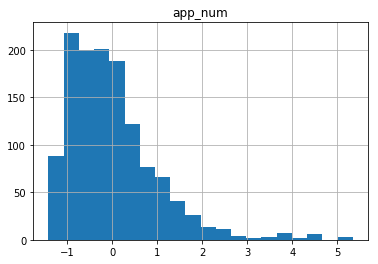

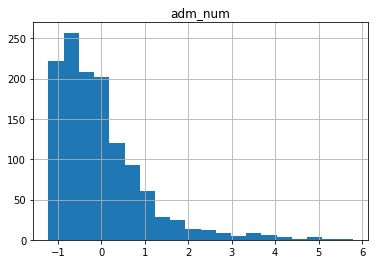

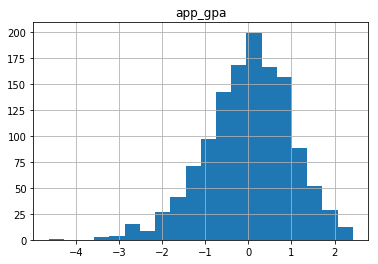

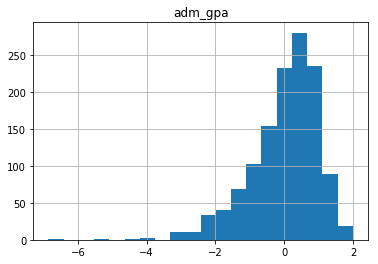

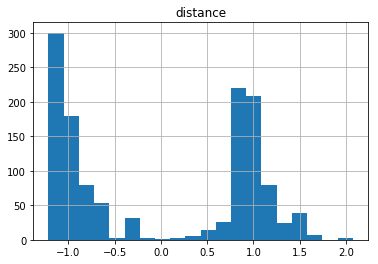

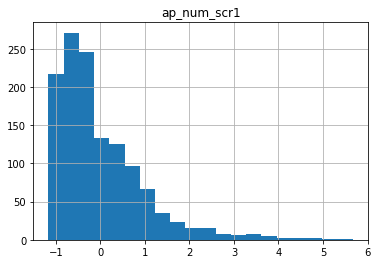

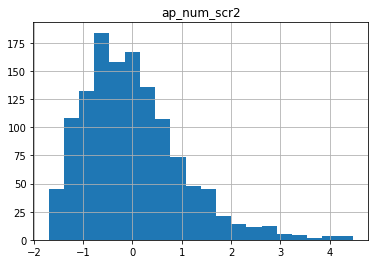

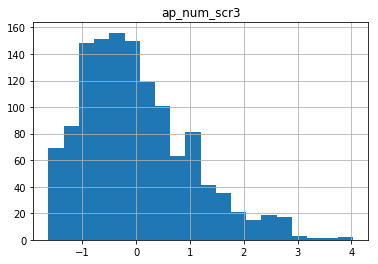

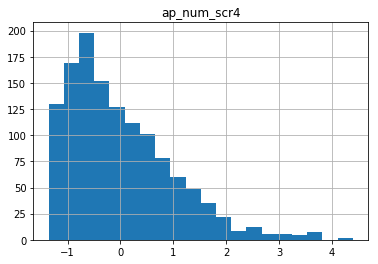

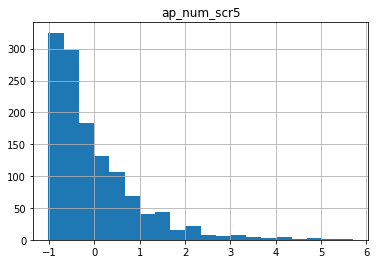

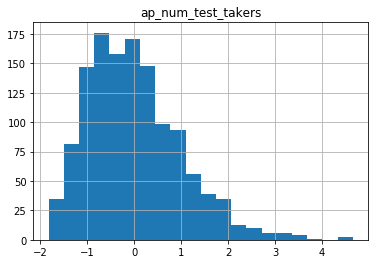

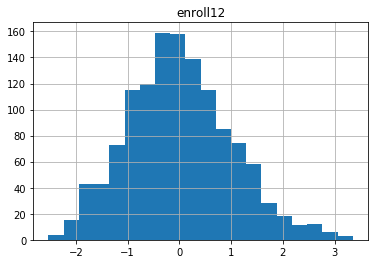

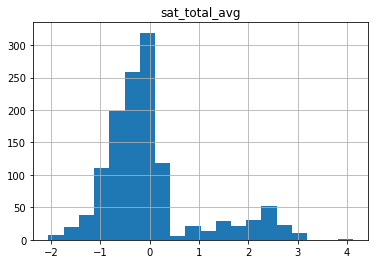

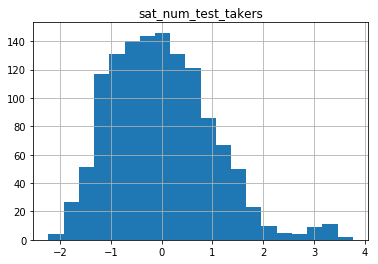

In [62]:
for col in X_z.columns:
    plt.figure()
    plt.title(col)
    X_z[col].hist(bins=20)

## Split the data into train and test sets
Use all early years for training, and later years for testing. This is to emulate the real fact that universities would train and evaluate this way.

In [71]:
RATIO = .7
years = X_z['year'].unique()
cutoff_year = years[  int(math.ceil(len(years)*RATIO))  ]
train_idxs, test_idxs = X_z['year'] <= cutoff_year, X_z['year'] > cutoff_year
print(cutoff_year)

0.9745596976384221


In [64]:
X_train, X_test = X_z[train_idxs], X_z[test_idxs]
y_train, y_test = y_z[train_idxs], y_z[test_idxs]

## make and fit a linear regressor

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
y_pred = reg.predict(X_test)
data_result = pd.DataFrame(data={'actual':y_test.values.flatten(), 'predicted':y_pred.flatten()}) 
data_result.head(10)

,actual,predicted
0,1.902345,0.013932
1,1.902345,0.591790
2,-1.151636,0.198892
3,-0.929528,-0.001239
4,0.699262,0.095975
5,-0.639822,0.206775
6,-1.345980,-0.001225
7,-0.788187,-0.515261
8,-0.356347,0.128115
9,0.524268,0.378555


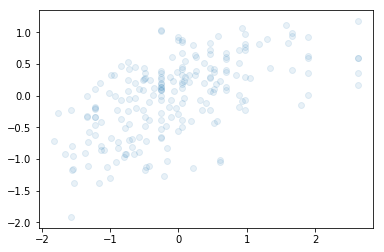

In [67]:
plt.scatter(y_test.values.flatten(), y_pred.flatten(), alpha=.1)

In [68]:
reg.score(X_test, y_test)

0.3374095357825033

In [70]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     51.77
Date:                Mon, 14 May 2018   Prob (F-statistic):          5.91e-115
Time:                        20:09:17   Log-Likelihood:                -1232.1
No. Observations:                1067   AIC:                             2496.
Df Residuals:                    1051   BIC:                             2576.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0071      0.026      0.274      0.784      -0.044       0.058
year                    0.0843      0.041      2.080      0.038       0.005       0.164
app_num                 0.2053      0.077      2.674      0.008       0.055       0.356
adm_num                -0.4197      0.060     -6.998      0.000      -0.537      -0.302
app_gpa                -0.0421      0.037     -1.131      0.258      -0.115       0.031
adm_gpa                -0.1149      0.033     -3.476      0.001      -0.180      -0.050
distance               -0.2937      0.029    -10.217      0.000      -0.350      -0.237
ap_num_scr1             0.0177      0.049      0.361      0.718      -0.078       0.114
ap_num_scr2             0.1513      0.072      2.110      0.035       0.011       0.292
ap_num_scr3             0.0802      0.123      0.654      0.513      -0.161       0.321
ap_num_scr4            -0.3478      0.137     -2.544      0.011      -0.616      -0.080
ap_num_scr5             0.4176      0.101      4.121      0.000       0.219       0.616
ap_num_test_takers     -0.4832      0.133     -3.639      0.000      -0.744      -0.223
enroll12                0.1675      0.042      4.016      0.000       0.086       0.249
sat_total_avg          -0.0461      0.025     -1.830      0.068      -0.096       0.003
sat_num_test_takers    -0.0771      0.066     -1.175      0.240      -0.206       0.052
==============================================================================
Omnibus:                       24.489   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.571
Skew:                           0.373   Prob(JB):                     2.80e-06
Kurtosis:                       3.140   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""